In [7]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [9.50, 3.50]
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

warnings.filterwarnings("ignore")

In [8]:
file = os.path.join('datasets','ExtractedFeatures.csv')
file1 = os.path.join("datasets","Ex_ArcSwipe_Scoring_Rules.csv")
scoring_rule = os.path.join("datasets","Ex_ArcSwipe_Scoring_Rules.csv")
metric_name = os.path.join("datasets","ArcSwipe List of Metrics - Sheet1.csv")

In [9]:
score_data = pd.read_csv(scoring_rule, header=None)
metric_data = pd.read_csv(metric_name, header=None)

In [10]:
metric_name = {key: value for (key, value) in zip(metric_data[0],metric_data[1])}

score_data.replace(to_replace=[keys for keys in metric_name.keys()], 
             value=[values for values in metric_name.values()],
             inplace=True)

### Feature Space

In [11]:
feature_space = score_data[1].unique()
print(feature_space)

['Safety violation human contact'
 'Safety violation unsafe parking position'
 'Safety violation Flipped Vehicle' 'Safety violation electrical lines'
 'Safety violation load over human' 'Collisions with environment'
 'Number of times user had to restart an arc' 'Average score per path'
 'Number of tennis balls knocked over by operator'
 'Number of poles touched' 'Number of poles that fell over'
 'Number of barrels touches' 'Number of barrels knocked over'
 'Exercise Time']


In [12]:
data = pd.read_csv(file)
data.drop(columns=['Unnamed: 0'], inplace=True)

data1 = pd.read_csv(file1, header=None)

In [13]:
data.head()

,Session id,Time Step,Current trainee score at that time,Number of tennis balls knocked over by operator,Number of barrels knocked over,Number of barrels touches,Number of equipment collisions,Number of poles that fell over,Number of poles touched,Number of times user had to restart an arc,...,Tracks Ground Pressure Rear Right,Safety violation bucket over truck cab,Safety violation dump truck contact,Safety violation electrical lines,Safety violation human contact,Safety violation load over human,Safety violation unsafe parking position,Safety violation Flipped Vehicle,Exercise Number of goals met,Exercise Time
0,5efb51adbcf5631c1400b415,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.216817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
1,5efb51adbcf5631c1400b415,1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.172409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.983333
2,5efb51adbcf5631c1400b415,2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.128039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.983333
3,5efb51adbcf5631c1400b415,3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.083706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.983333
4,5efb51adbcf5631c1400b415,4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73002.039411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.983333


### Session with the best performance

In [14]:
def duration_of_session(session : str) -> int:
    duration = data.loc[data["Session id"]==session, "Time Step"]
    return len(duration)

def total_score(session: str):
    score = data.loc[data['Session id']==session,"Current trainee score at that time"].min()
    return score    

In [15]:
sessions = data["Session id"].unique()

2000 48 596.4


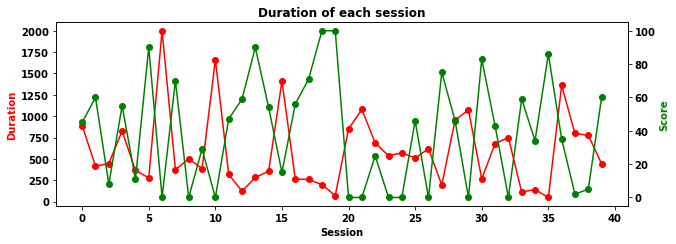

In [16]:
def session_v_duration_plot():
    all_sessions = [i for i in range(len(sessions))]
    durations = list(map(duration_of_session, sessions))
    scores = list(map(total_score, sessions))
    print(max(durations), min(durations), mean(durations))
    
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    
    plt.title("Duration of each session", fontweight="bold")
    ax.set_xlabel("Session")
    ax.set_ylabel("Duration", color='r')
    ax2.set_ylabel("Score",color='g')
    ax.plot(all_sessions, durations, '-ro')
    ax2.plot(all_sessions, scores, '-go')
    
session_v_duration_plot()    

In [17]:
print("All Features")
print(data.columns[3:])

All Features
Index(['Number of tennis balls knocked over by operator',
       'Number of barrels knocked over', 'Number of barrels touches',
       'Number of equipment collisions', 'Number of poles that fell over',
       'Number of poles touched', 'Number of times user had to restart an arc',
       'Average time out of path range', 'Current path time out of range',
       'Average score per path', 'Current path score', 'Average time per path',
       'Current path time', 'Total time out of path', 'Total path time',
       'Wind speed', 'Collisions with environment', 'Bucket Angle',
       'Bucket Height', 'Bucket Self Contact', 'Engine Average Power',
       'Current Engine Power', 'Engine Torque', 'Engine Torque Average',
       'Fuel Consumption Rate Average', 'Fuel Consumption',
       'Number of times machine was left idling',
       'Total time machine was left idling',
       'Ratio of time that operator runs equipment vs idle time',
       'Engine RPM (%)', 'Engine RPM Averag

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.      

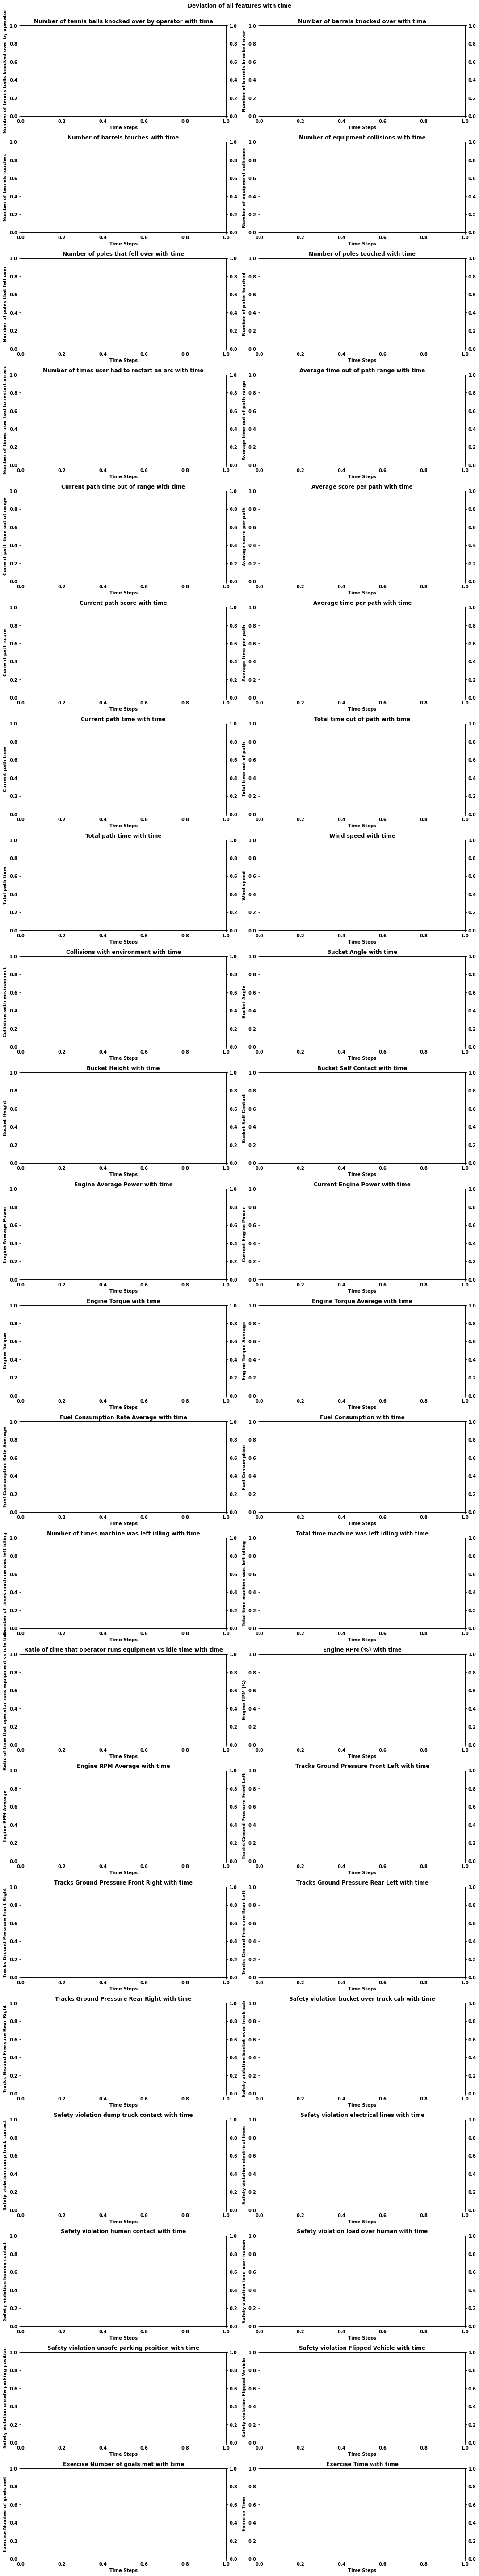

In [26]:
def deviation_of_features_with_time(features, axis):
    
    ax1 = axis.twinx()
    axis.set_title(f"{features} with time", fontweight="bold")
    axis.set_xlabel(f"Time Steps")
    axis.set_ylabel(f"{features}")
    sessions = [sess for sess in data["Session id"].unique() if min(data.loc[data["Session id"]==sess, "Current trainee score at that time"]) > 50]
    for sess in sessions:
        values = data.loc[data["Session id"]==sess, features]
        time_steps = data.loc[data["Session id"]==sess, "Time Step"]
        axis.plot(time_steps, values)    
    
def show_deviation_all_features_with_time():
    fig, ax = plt.subplots(len(data.columns[3:])//2, 2)
    fig.set_figheight(80)
    fig.set_figwidth(15)
    fig.suptitle("Deviation of all features with time", y=1.0, fontweight="bold")
    
    for i, feat in enumerate(data.columns[3:]):
        deviation_of_features_with_time(feat, ax[i//2,i%2]) 
        
    plt.show()    
        
show_deviation_all_features_with_time()               

#### Features to skip based on the visualization 
##### Reason - Zero value for all time steps
* Safety Violation unsafe parking position
* Safety violation flipped vehicle
* Safety violation human contact
* Safety violation load over human
* Safety violation electric lines
* Safety violation dump truck contact
* Safety violation bucket over truck cab
* Bucket Self contact
* Wind speed
* Number of barrel touches
* Number of barrels knocked over
* Average score per path
* Current path score

In [14]:
features_to_skip = ['Safety violation unsafe parking position', 'Safety violation Flipped Vehicle', 'Safety violation human contact',
                    'Safety violation load over human', 'Safety violation electrical lines', 'Safety violation dump truck contact', 
                    'Safety violation bucket over truck cab', 'Bucket Self Contact', 'Wind speed', 'Number of barrels touches', 
                    'Number of barrels knocked over','Average score per path', 'Current path score']

print(f"Total Original Features: {len(data.columns[3:])}")
print(f"Total Features Removed: {len(features_to_skip)}")

data.drop(columns=features_to_skip, inplace=True)

Total Original Features: 44
Total Features Removed: 13


#### Remove Correlated features

Using correlated features are redundant information as they add the same information

In [15]:
data_corr = data.loc[:,data.columns[3:]].corr()
data_corr.head()

,Number of tennis balls knocked over by operator,Number of equipment collisions,Number of poles that fell over,Number of poles touched,Number of times user had to restart an arc,Average time out of path range,Current path time out of range,Average time per path,Current path time,Total time out of path,...,Total time machine was left idling,Ratio of time that operator runs equipment vs idle time,Engine RPM (%),Engine RPM Average,Tracks Ground Pressure Front Left,Tracks Ground Pressure Front Right,Tracks Ground Pressure Rear Left,Tracks Ground Pressure Rear Right,Exercise Number of goals met,Exercise Time
Number of tennis balls knocked over by operator,1.000000,0.268048,0.882550,0.950297,0.553588,0.419483,0.405045,0.502585,0.405043,0.336935,...,0.129600,0.126267,0.170165,0.142432,-0.187746,-0.001378,0.003958,0.184431,0.009101,0.539361
Number of equipment collisions,0.268048,1.000000,0.247402,0.232551,0.497967,0.377025,-0.027765,0.299771,-0.103478,0.617541,...,0.220894,0.082790,-0.073821,-0.024148,0.087811,-0.404582,0.391857,-0.091120,0.512431,0.454970
Number of poles that fell over,0.882550,0.247402,1.000000,0.896830,0.496565,0.389966,0.302955,0.359109,0.228547,0.319670,...,-0.002190,0.086667,0.229929,0.225432,-0.146286,-0.056675,0.057076,0.143036,0.023118,0.374868
Number of poles touched,0.950297,0.232551,0.896830,1.000000,0.529086,0.394493,0.452943,0.486765,0.465022,0.297164,...,0.164672,0.108881,0.170118,0.122030,-0.199219,0.018973,-0.010253,0.190433,-0.033933,0.536412
Number of times user had to restart an arc,0.553588,0.497967,0.496565,0.529086,1.000000,0.435727,0.190696,0.495424,0.280358,0.630152,...,0.149370,0.135919,0.023096,0.036488,0.101242,-0.132734,0.101878,-0.074665,0.432178,0.736710


<AxesSubplot:>

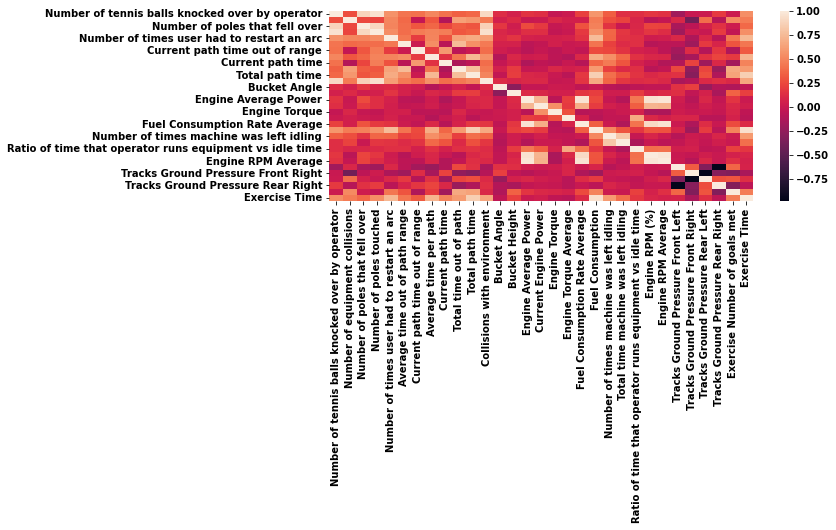

In [16]:
sns.heatmap(data_corr)

In [17]:
def reward_normalizel():
    data["Current trainee score at that time"] = data["Current trainee score at that time"][:] - 100
    for sess in data["Session id"].unique():
        test_cond = (data["Session id"]==sess)
        indx = data.index[test_cond].tolist()
        succes = data["Current trainee score at that time"][indx[1:]].tolist()
        predec = data["Current trainee score at that time"][indx[:-1]].tolist()
        output = list(np.array(succes)-np.array(predec))
        data["Current trainee score at that time"][indx[1:]] = output

reward_normalizel()      

In [18]:
corr_columns = []
for i in range(len(data_corr)):
    for j in range(i+1, len(data_corr)):
        if abs(data_corr.iloc[i,j]) > 0.97 and data_corr.columns[j] not in corr_columns:
            corr_columns.append(data_corr.columns[j])

print(f"Total Correlated features: {len(corr_columns)}") 
print(f"Correlated features: {corr_columns}")  

Total Correlated features: 3
Correlated features: ['Engine RPM Average', 'Tracks Ground Pressure Rear Right', 'Tracks Ground Pressure Rear Left']


In [19]:
print(f"Final Features for training: {data.columns[3:]}")

Final Features for training: Index(['Number of tennis balls knocked over by operator',
       'Number of equipment collisions', 'Number of poles that fell over',
       'Number of poles touched', 'Number of times user had to restart an arc',
       'Average time out of path range', 'Current path time out of range',
       'Average time per path', 'Current path time', 'Total time out of path',
       'Total path time', 'Collisions with environment', 'Bucket Angle',
       'Bucket Height', 'Engine Average Power', 'Current Engine Power',
       'Engine Torque', 'Engine Torque Average',
       'Fuel Consumption Rate Average', 'Fuel Consumption',
       'Number of times machine was left idling',
       'Total time machine was left idling',
       'Ratio of time that operator runs equipment vs idle time',
       'Engine RPM (%)', 'Engine RPM Average',
       'Tracks Ground Pressure Front Left',
       'Tracks Ground Pressure Front Right',
       'Tracks Ground Pressure Rear Left', 'Tracks Gr

In [20]:
for feature in data.columns[3:]:
    print(f"Feature: {feature}, Max Value: {data[feature].max()}, Min Value: {data[feature].min()}")

Feature: Number of tennis balls knocked over by operator, Max Value: 12.0, Min Value: 0.0
Feature: Number of equipment collisions, Max Value: 3.0, Min Value: 0.0
Feature: Number of poles that fell over, Max Value: 7.0, Min Value: 0.0
Feature: Number of poles touched, Max Value: 16.0, Min Value: 0.0
Feature: Number of times user had to restart an arc, Max Value: 12.0, Min Value: 0.0
Feature: Average time out of path range, Max Value: 48.19999999999727, Min Value: 0.0
Feature: Current path time out of range, Max Value: 308.0166666663865, Min Value: 0.0
Feature: Average time per path, Max Value: 574.822222221809, Min Value: 0.0
Feature: Current path time, Max Value: 1493.8999999986856, Min Value: 0.0
Feature: Total time out of path, Max Value: 197.8666666665049, Min Value: 0.0
Feature: Total path time, Max Value: 1973.9999999985328, Min Value: 0.0
Feature: Collisions with environment, Max Value: 23.0, Min Value: 0.0
Feature: Bucket Angle, Max Value: 2.202947747679275, Min Value: -2.390703

In [21]:
def create_dataset(sessions, dataframe):
    for sess in sessions:
        sess_feat = data.loc[data["Session id"]==sess,:]
        for i in range(len(sess_feat)):
            dataframe.loc[len(dataframe)] = sess_feat.iloc[i,:]
    return dataframe        

In [ ]:
test_sess = ['5f29aee75503690dc400e6ed', '5efb87a555036917a005aedb', '5f0f52175503691a38012a4f', '5f0f5715bcf56303ec02201e']
valid_sess = ['5f298dab5503691770019164', '5f16fba5bcf563077800defe', '5efcedc85503691934046c9f', '5f0f357e55036922bc0394c1', 
         '5efceb355503691934044c21', '5f29ae6bb1a0e0078400bca5', '5f0f19c6bcf5631cc40054d5', '5f0f4991bcf56303ec009f44']
train_sess = [] 
for sess in data['Session id'].unique():
    if sess not in (test_sess + valid_sess):
        train_sess.append(sess)

train_df = pd.DataFrame(columns=data.columns)
val_df = pd.DataFrame(columns=data.columns)
test_df = pd.DataFrame(columns=data.columns)

train_df = create_dataset(train_sess, train_df)
val_df = create_dataset(valid_sess, val_df)
test_df = create_dataset(test_sess, test_df)

In [74]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

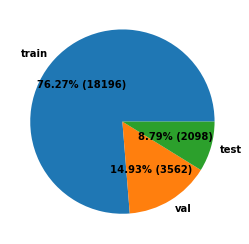

In [75]:
num_data = [18196,3562,2098]
labels = ["train", "val", "test"]
plt.pie(num_data, labels=labels, autopct=make_autopct(num_data))

plt.show()

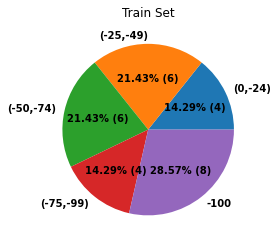

In [76]:
num = [4, 6, 6, 4, 8]
lab = ["(0,-24)","(-25,-49)","(-50,-74)","(-75,-99)", "-100"]
plt.title("Train Set")
plt.pie(num, labels=lab, autopct=make_autopct(num))
plt.show()

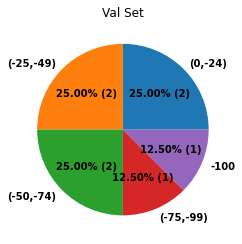

In [77]:
num = [2, 2, 2, 1, 1]
lab = ["(0,-24)","(-25,-49)","(-50,-74)","(-75,-99)", "-100"]
plt.title("Val Set")
plt.pie(num, labels=lab, autopct=make_autopct(num))
plt.show()

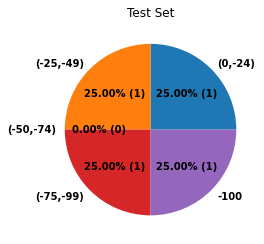

In [78]:
num = [1, 1, 0, 1, 1]
lab = ["(0,-24)","(-25,-49)","(-50,-74)","(-75,-99)", "-100"]
plt.title("Test Set")
plt.pie(num, labels=lab, autopct=make_autopct(num))
plt.show()

In [63]:
data.to_csv(os.path.join("datasets","features_to_train.csv"), index=False)
train_df.to_csv(os.path.join("datasets","train_df.csv"), index=False)
val_df.to_csv(os.path.join("datasets","val_df.csv"), index=False)
test_df.to_csv(os.path.join("datasets","test_df.csv"), index=False)